In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample



In [8]:
df = pd.read_excel("Задания/Datasets/blood.xlsx")
df.columns = ['x1', 'x2', 'x3']
print(df.shape)
df.head(20)

(11, 3)


,x1,x2,x3
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196
5,168,74,220
6,137,54,188
7,149,61,188
8,159,65,207
9,128,46,167


Optimal alpha value: 91.15888299750819
Model coefficients: [0.53306645 0.43955921]
Intercept: 31.36208109179171


/opt/anaconda3/envs/math_stat/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/opt/anaconda3/envs/math_stat/lib/python3.11/site-packages/sklearn/utils/deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


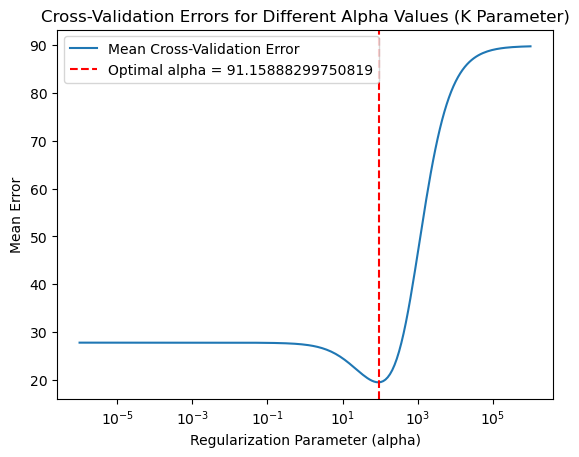

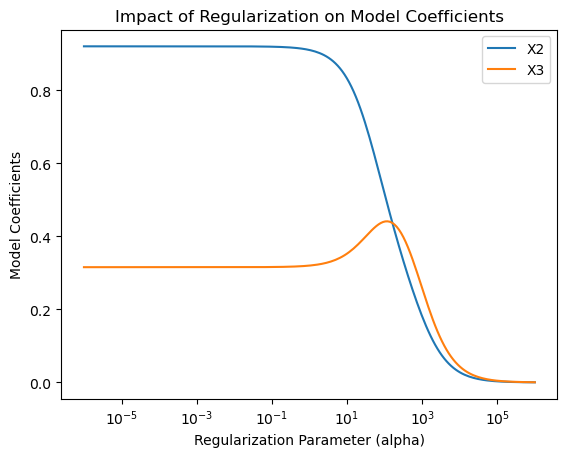

In [9]:
# 1
X = df.drop(['x1'], axis=1) 
y = df['x1'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter tuning for alpha using cross-validation
alphas = np.logspace(-6, 6, 200)  # Wide range of alpha values for searching
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

# Optimal alpha value
optimal_alpha = ridge_cv.alpha_
print(f'Optimal alpha value: {optimal_alpha}')

print(f'Model coefficients: {ridge_cv.coef_}')
print(f'Intercept: {ridge_cv.intercept_}')

# cv.plot: Cross-validation error plot, plotting the error against alpha
cv_errors = np.mean(ridge_cv.cv_values_, axis=0)

plt.plot(alphas, cv_errors, label='Mean Cross-Validation Error')
plt.axvline(ridge_cv.alpha_, linestyle='--', color='red', label=f'Optimal alpha = {ridge_cv.alpha_}')
plt.xscale('log')
plt.xlabel('Regularization Parameter (alpha)')
plt.ylabel('Mean Error')
plt.title('Cross-Validation Errors for Different Alpha Values (K Parameter)')
plt.legend()
plt.show()

# bias.plot: Plotting the coefficients against the regularization parameter
coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Regularization Parameter (alpha)')
plt.ylabel('Model Coefficients')
plt.title('Impact of Regularization on Model Coefficients')
plt.legend(['X2', 'X3'])
plt.show()

### В процессе подбора параметра регуляризации (альфа) в ридж-регрессии, каждая кросс-валидация вычисляет ошибку модели для разных значений альфа. Именно на основании ошибок выбирается оптимальный параметр, который минимизирует ошибку.


### Кросс-валидационные ошибки отражают, насколько точны предсказания модели на каждой итерации валидации, и чем меньше средняя ошибка, тем лучше модель способна предсказывать данные.

In [10]:
# 2
# Standardization of data (VIF is better calculated on standardized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Creating a DataFrame for VIF results
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data)

  Feature       VIF
0      x2  9.525022
1      x3  9.525022


- VIF = 1: Нет корреляции между этим признаком и остальными.
- 1 < VIF ≤ 5: Умеренная корреляция, не вызывает беспокойства.
- VIF > 5: Высокая корреляция, возможна мультиколлинеарность.
- VIF > 10: Сильная мультиколлинеарность, признаки могут быть слишком сильно коррелированы.

In [11]:
# 3 In the case of a linear regression model
model = sm.OLS(y, X)  
results = model.fit() 
results.summary() 

/opt/anaconda3/envs/math_stat/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     x1   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.418e+04
Date:                Wed, 23 Oct 2024   Prob (F-statistic):                    1.80e-16
Time:                        15:10:39   Log-Likelihood:                         -26.465
No. Observations:                  11   AIC:                                      56.93
Df Residuals:                       9   BIC:                                      57.72
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x2             0.3975      0.220      1.804      0.105      -0.101       0.896
x3             0.6419      0.071      9.041      0.000       0.481       0.802
==============================================================================
Omnibus:                        0.665   Durbin-Watson:                   2.603
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.637
Skew:                          -0.401   Prob(JB):                        0.727
Kurtosis:                       2.136   Cond. No.                         53.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### переменная x2 является не значимой т.к p>0,05

### как показыввает F статистика и p < 0,05 видно что x1 сильно зависит от x2 x3

### Ридж-регрессия - это метод который подходит для ситуаций с высокой мультиколлинеарностью, так как он контролирует большие коэффициенты и уменьшает их влияние, что стабилизирует модель.

In [12]:
# 3 In the case of ridge regression
# Hyperparameter tuning for alpha using cross-validation
ridge_cv = Ridge(alpha=0.9115888299750819)
ridge_cv.fit(X, y) 

# Predictions and metrics for ridge regression
y_pred = ridge_cv.predict(X) 
mse_ridge = mean_squared_error(y, y_pred)
r2_ridge = r2_score(y, y_pred)

# Evaluate MSE for the model without explanatory variables (mean of y)
y_mean_pred = np.full_like(y, y.mean())  
mse_baseline = mean_squared_error(y, y_mean_pred)  

# F-statistic
f_stat = ((mse_baseline - mse_ridge) / len(ridge_cv.coef_)) / (mse_ridge / (len(y) - len(ridge_cv.coef_) - 1))
print(f"F-statistic: {f_stat}")  

# Bootstrap for estimating the significance of coefficients
n_iterations = 1000 
coeffs = []

for i in range(n_iterations):
    X_resample, y_resample = resample(X, y)
    ridge_cv.fit(X_resample, y_resample)  
    coeffs.append(ridge_cv.coef_)

# Mean and confidence intervals for the coefficients
coeffs = np.array(coeffs)
mean_coeffs = np.mean(coeffs, axis=0)  
conf_intervals = np.percentile(coeffs, [2.5, 97.5], axis=0)

for idx, feature in enumerate(X.columns):
    print(f"Feature: {feature}")
    print(f"Mean Coefficient: {mean_coeffs[idx]}")
    print(f"95% Confidence Interval: {conf_intervals[:, idx]}")

F-statistic: 168.75489175633282


Feature: x2
Mean Coefficient: 0.8384206359082972
95% Confidence Interval: [0.21538158 1.41383418]
Feature: x3
Mean Coefficient: 0.3463319982602594
95% Confidence Interval: [0.05823724 0.6178765 ]


### В случае ридж регрессии и х2 и х3 являются значимыми коэффициентами. И значение F теста больше чем у ols а значит использоване ridge лучше в случае высокой корреляции коэффициентов